In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
original_df = pd.read_csv("./data/horse.csv")
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [3]:
print(f"original data shape : {original_df.shape}")
print(f"train data shape : {train_df.shape}")
print(f"test data shape : {test_df.shape}")

original data shape : (299, 28)
train data shape : (1235, 29)
test data shape : (824, 28)


In [4]:
def summary_df(dataset, df):
    """
        Args:
            dataset ( str ): Name of the dataset
            df ( dataframe ): dataframe

        Returns:
            summary ( dataframe ): summary of the input dataframe with No of missing values, % missing values compared to original dataset, No of unique values, No of non null rows
    """
    summary = pd.DataFrame(df.dtypes, columns=[f'{dataset}_dtypes'])
    summary[f'{dataset}_missing#'] = df.isna().sum()
    summary[f'{dataset}_missing%'] = ((df.isna().sum())/len(df)*100).round(1)
    summary[f'{dataset}_uniques'] = df.nunique().values
    summary[f'{dataset}_count'] = df.count().values
    #summary['skew'] = df.skew().values
    return summary

# Generate the summaries without styling first
train_summary = summary_df("train", train_df)
test_summary = summary_df("test", test_df)
origin_summary = summary_df("origin", original_df)

combined_summary = pd.concat([train_summary, test_summary, origin_summary], axis=1)

combined_summary.drop(["test_dtypes","origin_dtypes"],axis=1,inplace=True)
combined_summary.rename({"train_dtypes":"dtypes"},axis=1,inplace=True)
combined_summary.drop('id',axis=0,inplace=True)
combined_summary

,dtypes,train_missing#,train_missing%,train_uniques,train_count,test_missing#,test_missing%,test_uniques,test_count,origin_missing#,origin_missing%,origin_uniques,origin_count
surgery,object,0,0.0,2,1235,0.0,0.0,2.0,824.0,0.0,0.0,2.0,299.0
age,object,0,0.0,2,1235,0.0,0.0,2.0,824.0,0.0,0.0,2.0,299.0
hospital_number,int64,0,0.0,255,1235,0.0,0.0,210.0,824.0,0.0,0.0,283.0,299.0
rectal_temp,float64,0,0.0,43,1235,0.0,0.0,34.0,824.0,60.0,20.1,40.0,239.0
pulse,float64,0,0.0,50,1235,0.0,0.0,49.0,824.0,24.0,8.0,52.0,275.0
respiratory_rate,float64,0,0.0,37,1235,0.0,0.0,38.0,824.0,58.0,19.4,40.0,241.0
temp_of_extremities,object,39,3.2,4,1196,35.0,4.2,4.0,789.0,56.0,18.7,4.0,243.0
peripheral_pulse,object,60,4.9,4,1175,47.0,5.7,4.0,777.0,69.0,23.1,4.0,230.0
mucous_membrane,object,21,1.7,6,1214,13.0,1.6,6.0,811.0,47.0,15.7,6.0,252.0
capillary_refill_time,object,6,0.5,3,1229,6.0,0.7,3.0,818.0,32.0,10.7,3.0,267.0


In [5]:

fig = px.line(combined_summary, x=combined_summary.index, y=['origin_missing%', 'test_missing%', 'train_missing%'],
              labels={'x': 'Index', 'value': '% Missing'},
              title='% Missing values in datasets')

fig.update_xaxes(showgrid=False, tickangle=90)
fig.update_yaxes(showgrid=False)

fig.update_layout(title_x=0.5)

fig.update_layout(legend=dict(x=0.02,y=0.9, orientation='h'))

fig.show()

* Train and test dataset are simillar in terms of missing data
* Original dtaaset seems to have 10-15% of missing values in their dataset

In [6]:
cat_column_org = original_df.loc[:,~original_df.columns.isin(['outcome'])].select_dtypes('object').columns.tolist()
cat_column_train = train_df.loc[:,~train_df.columns.isin(['outcome'])].select_dtypes('object').columns.tolist()
cat_column_test = test_df.select_dtypes('object').columns.tolist()

In [7]:
cat_column_org == cat_column_train == cat_column_test

True

In [8]:
num_column_org = original_df.loc[:,~original_df.columns.isin(['outcome'])].select_dtypes(['int64','float64']).columns.tolist()
num_column_train = train_df.loc[:,~train_df.columns.isin(['outcome','id'])].select_dtypes(['int64','float64']).columns.tolist()
num_column_test = test_df.loc[:,~test_df.columns.isin(['outcome','id'])].select_dtypes(['int64','float64']).columns.tolist()

In [9]:
num_column_org == num_column_train == num_column_test

True

In [10]:
for c in cat_column_org:
    print(f"{c} : {original_df[c].nunique()} : {original_df[c].unique()}")
    print(f"{c} : {train_df[c].nunique()} : {train_df[c].unique()}")
    print(f"{c} : {test_df[c].nunique()} : {test_df[c].unique()}")

surgery : 2 : ['no' 'yes']
surgery : 2 : ['yes' 'no']
surgery : 2 : ['no' 'yes']
age : 2 : ['adult' 'young']
age : 2 : ['adult' 'young']
age : 2 : ['adult' 'young']
temp_of_extremities : 4 : ['cool' nan 'normal' 'cold' 'warm']
temp_of_extremities : 4 : ['cool' 'cold' 'normal' 'warm' nan]
temp_of_extremities : 4 : ['normal' 'cool' nan 'cold' 'warm']
peripheral_pulse : 4 : ['reduced' nan 'normal' 'absent' 'increased']
peripheral_pulse : 4 : ['reduced' 'normal' nan 'absent' 'increased']
peripheral_pulse : 4 : ['normal' 'reduced' nan 'absent' 'increased']
mucous_membrane : 6 : [nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink'
 'bright_red' 'bright_pink']
mucous_membrane : 6 : ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
mucous_membrane : 6 : ['normal_pink' 'bright_pink' 'bright_red' 'pale_cyanotic' 'dark_cyanotic'
 'pale_pink' nan]
capillary_refill_time : 3 : ['more_3_sec' 'less_3_sec' nan '3']
capillary_refill_time : 3 : ['more_3

In [11]:
for c in cat_column_org:
    if (train_df[c].nunique() != original_df[c].nunique() ) |(train_df[c].nunique() !=  test_df[c].nunique()) |(original_df[c].nunique() !=  test_df[c].nunique()):
        print(c)
        print("-"*50)
        print(f"original : {original_df[c].unique()}")
        print(f"train : {train_df[c].unique()}")
        print(f"test : {test_df[c].unique()}")
        print("="*50)
    else:
        pass

pain
--------------------------------------------------
original : ['extreme_pain' 'mild_pain' 'depressed' nan 'severe_pain' 'alert']
train : ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
test : ['mild_pain' 'depressed' 'severe_pain' 'extreme_pain' nan 'moderate'
 'alert']
peristalsis
--------------------------------------------------
original : ['absent' 'hypomotile' nan 'hypermotile' 'normal']
train : ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
test : ['hypomotile' 'absent' 'hypermotile' nan 'normal']
nasogastric_reflux
--------------------------------------------------
original : [nan 'less_1_liter' 'none' 'more_1_liter']
train : ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
test : ['none' 'more_1_liter' 'less_1_liter' nan]
rectal_exam_feces
--------------------------------------------------
original : ['decreased' 'absent' 'normal' nan 'increased']
train : ['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
test

They is a difference in unique values in orginal and in train and test data test

In [21]:
# Identify categorical, discrete numeric, and continuous numeric columns
categorical_cols = train_df.loc[:,~train_df.columns.isin(['id'])].select_dtypes(include=['object']).columns
numeric_cols = train_df.loc[:,~train_df.columns.isin(['id'])].select_dtypes(exclude=['object']).columns


In [22]:
categorical_cols

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'outcome'],
      dtype='object')

In [23]:
numeric_cols

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [24]:
discrete_numeric_cols = ['hospital_number','lesion_1', 'lesion_2', 'lesion_3']

In [25]:
continuous_numeric_cols = list(set(numeric_cols) - set(discrete_numeric_cols))


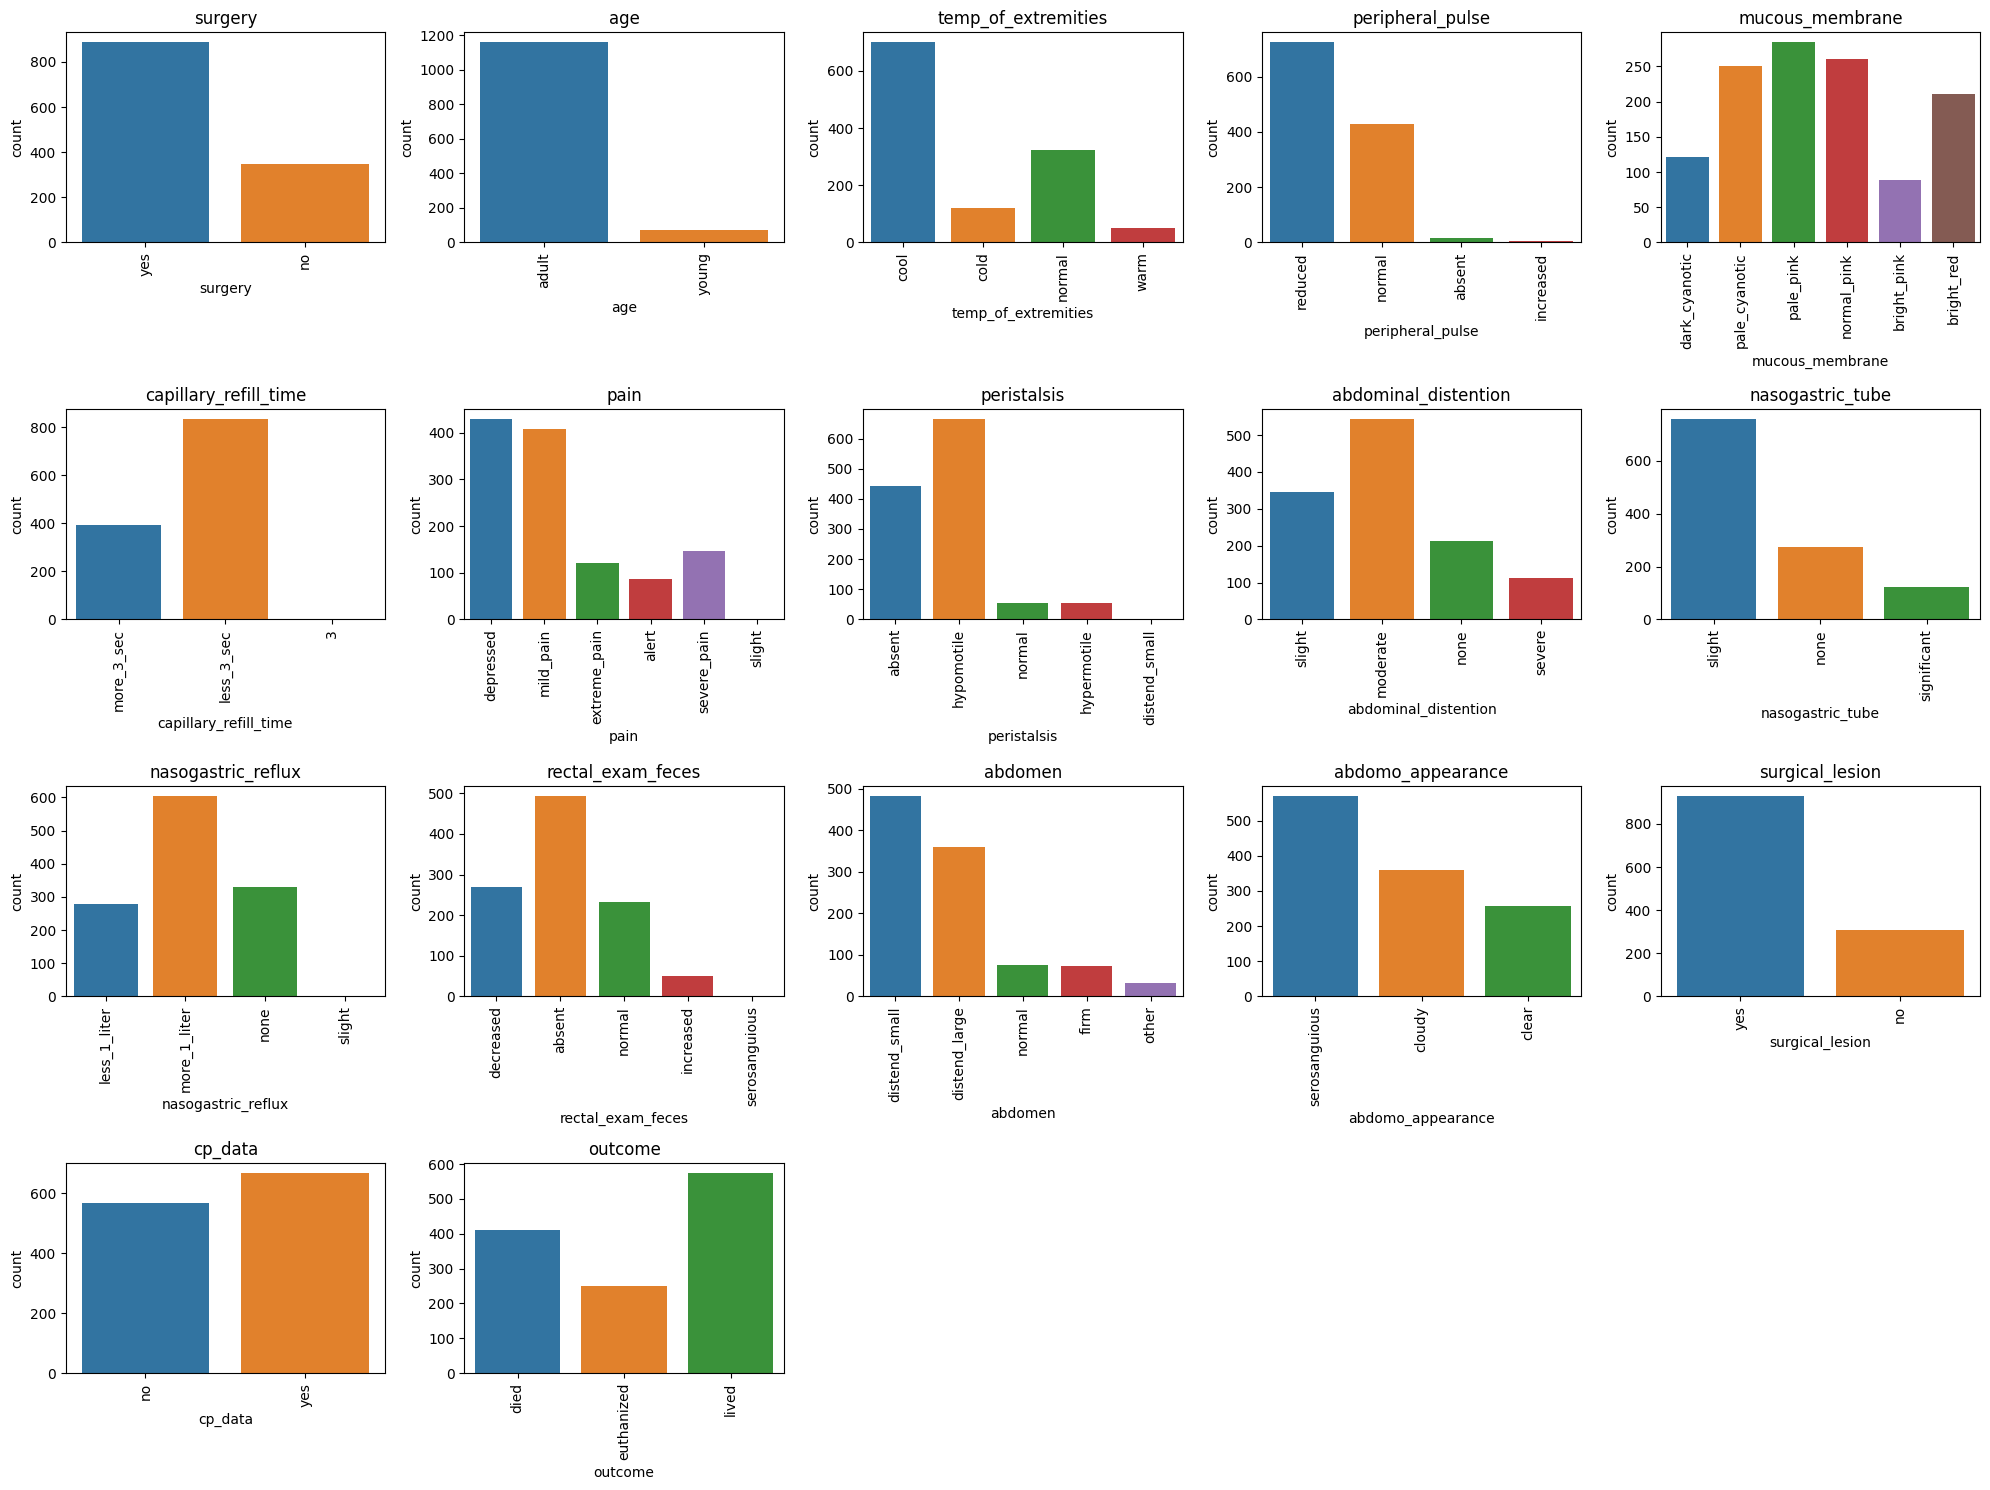

In [26]:

# Visualization for Categorical Columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 5, i)
    sns.countplot(data=train_df, x=col)
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout()
plt.show()

In [35]:
for c in discrete_numeric_cols:
    print(train_df[c].value_counts())

hospital_number
529461     46
528548     32
528996     21
5290409    20
529667     20
           ..
532985      1
527526      1
535415      1
5289419     1
530157      1
Name: count, Length: 255, dtype: int64
lesion_1
2208     152
3205     116
2205     104
2209     102
0         94
3111      91
2124      52
1400      49
4205      45
2112      40
31110     39
2206      35
5400      35
7111      31
2113      30
2207      26
400       15
7400      14
3209      13
7209      12
4300       9
3025       9
12208      8
2300       8
8300       7
2322       6
3113       6
5206       6
3207       6
8400       5
9400       5
5000       5
3133       4
11300      4
5205       4
5111       4
3115       4
6111       4
1124       3
4124       3
11400      3
2111       3
4206       3
1111       2
6112       2
300        2
3124       2
6209       2
2305       2
5124       2
3112       1
3300       1
2202       1
4207       1
11124      1
21110      1
41110      1
Name: count, dtype: int64
lesion_2
0     

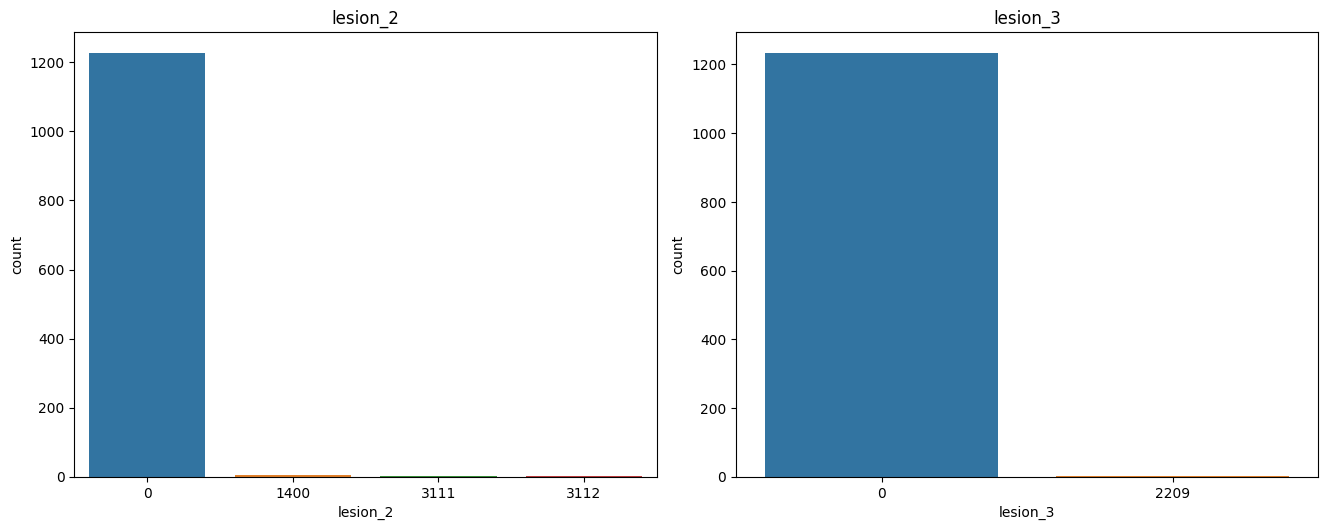

In [36]:
# Visualization for Discrete Numeric Columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(discrete_numeric_cols[-2:], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=train_df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


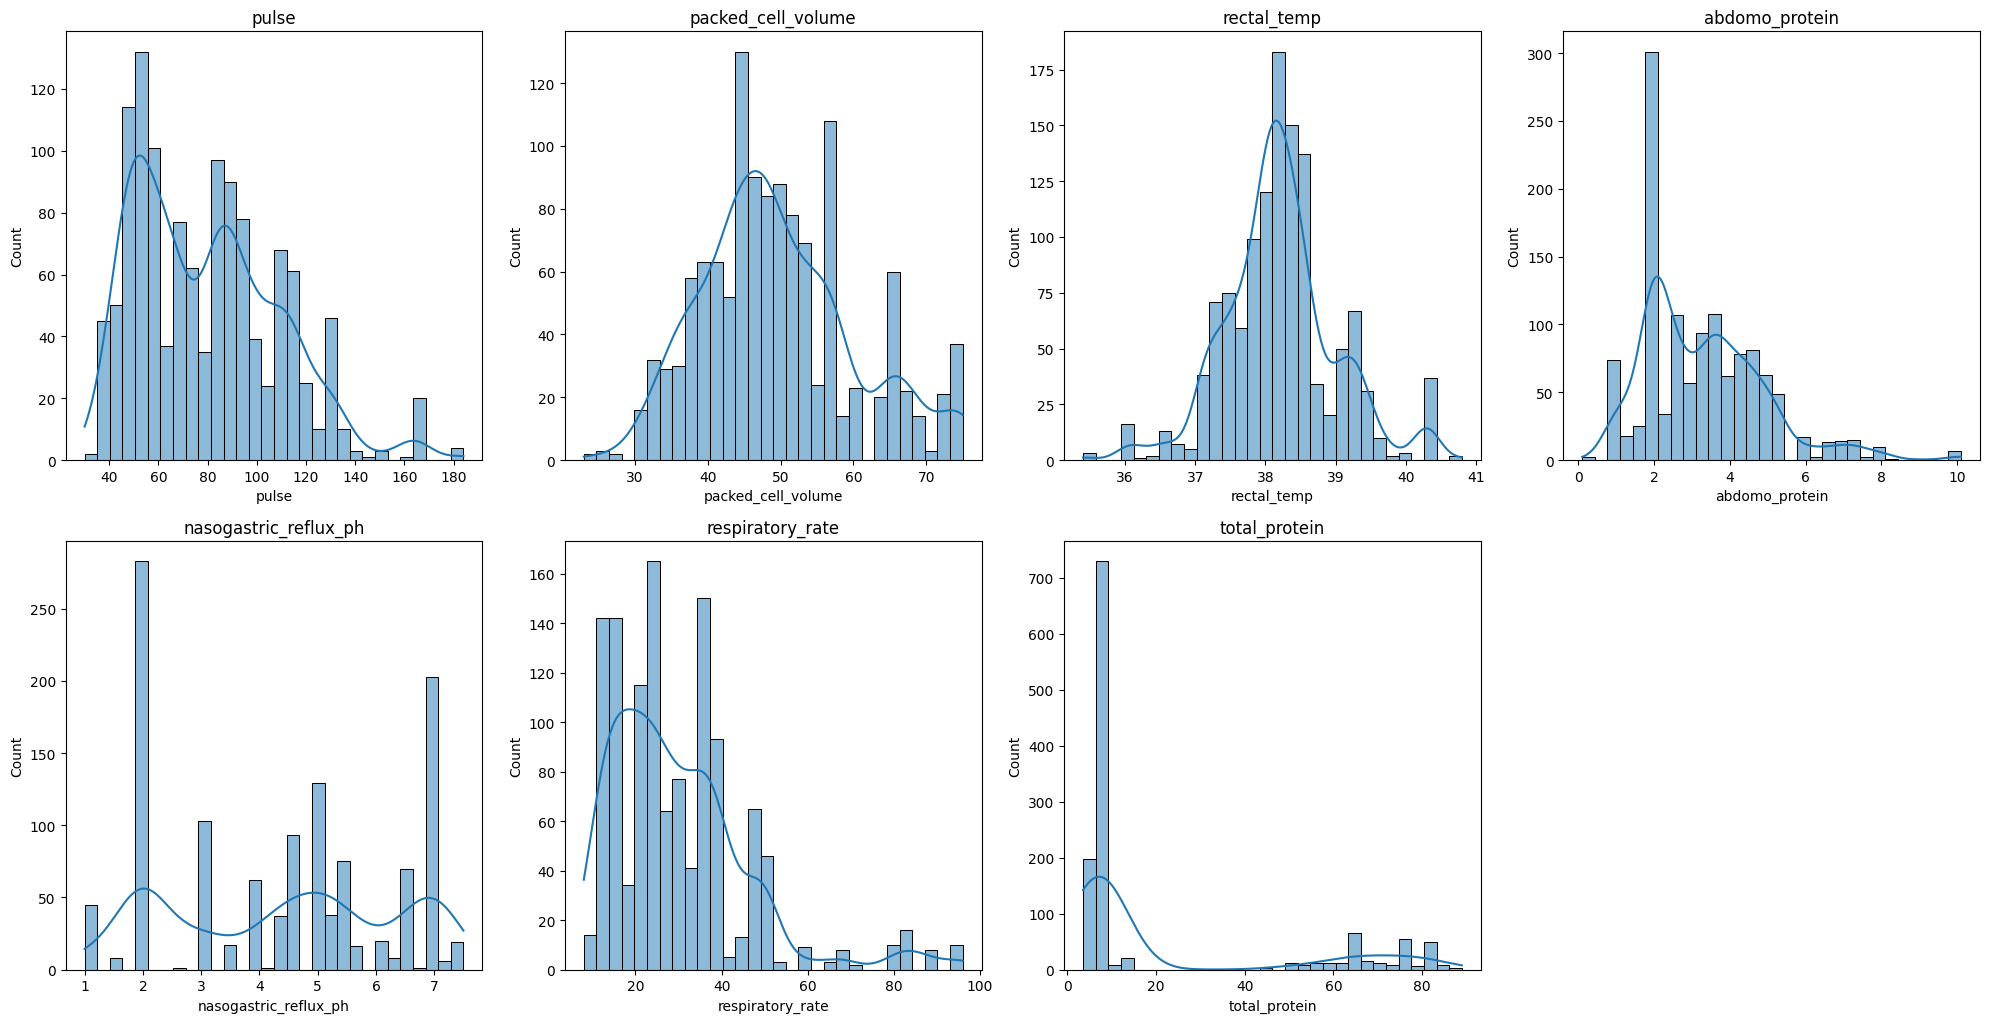

In [29]:
# Visualization for Continuous Numeric Columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=train_df, x=col, kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


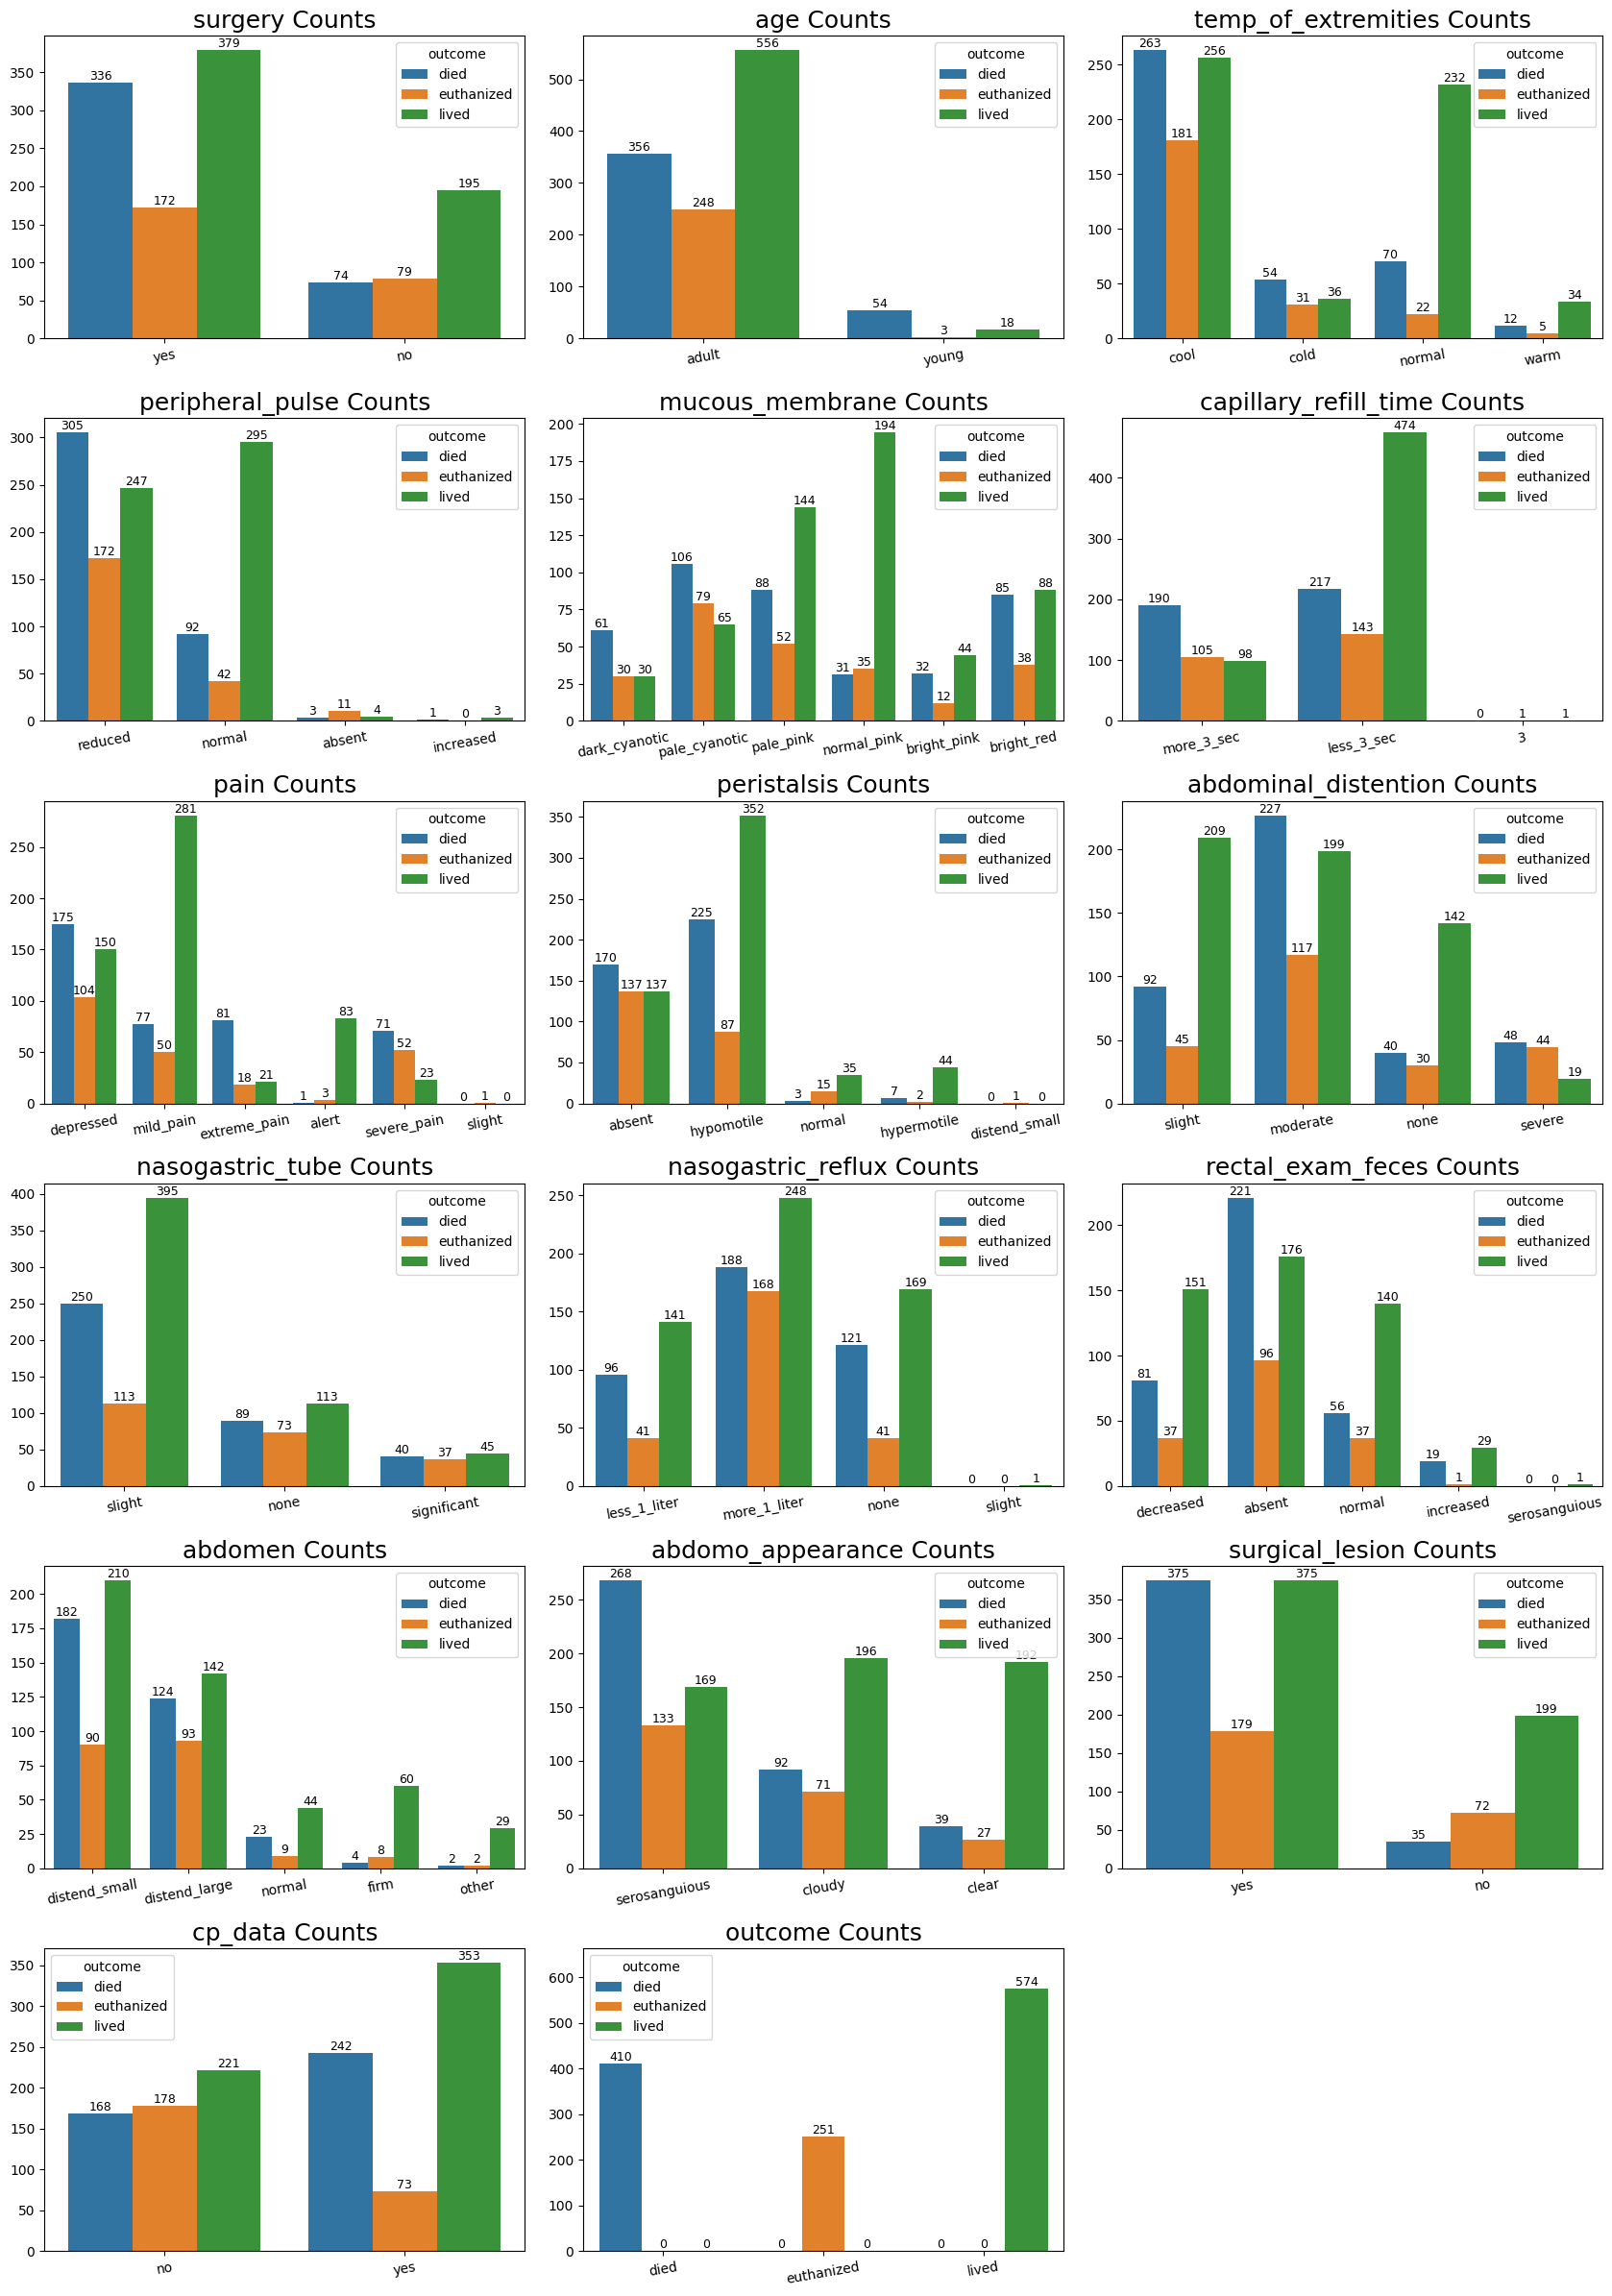

In [15]:
# Visualization for Categorical Columns based on Outcome
def plot_count(df,columns,n_cols,hue):
    '''
    # Function to genear countplot
    df: total data
    columns: category variables
    n_cols: num of cols
    '''
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()
    
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i],hue=hue)

        # Titles
        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x', rotation=10)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    # fig.suptitle(plotname, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
plot_count(train_df,categorical_cols,3,'outcome')


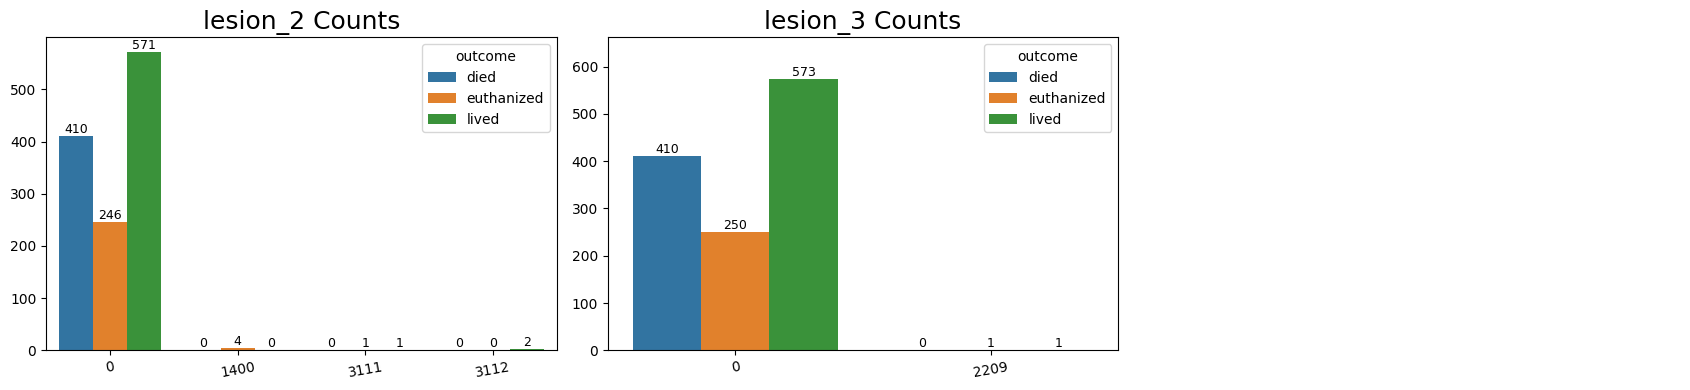

In [37]:
plot_count(train_df,discrete_numeric_cols[-2:],3,'outcome')

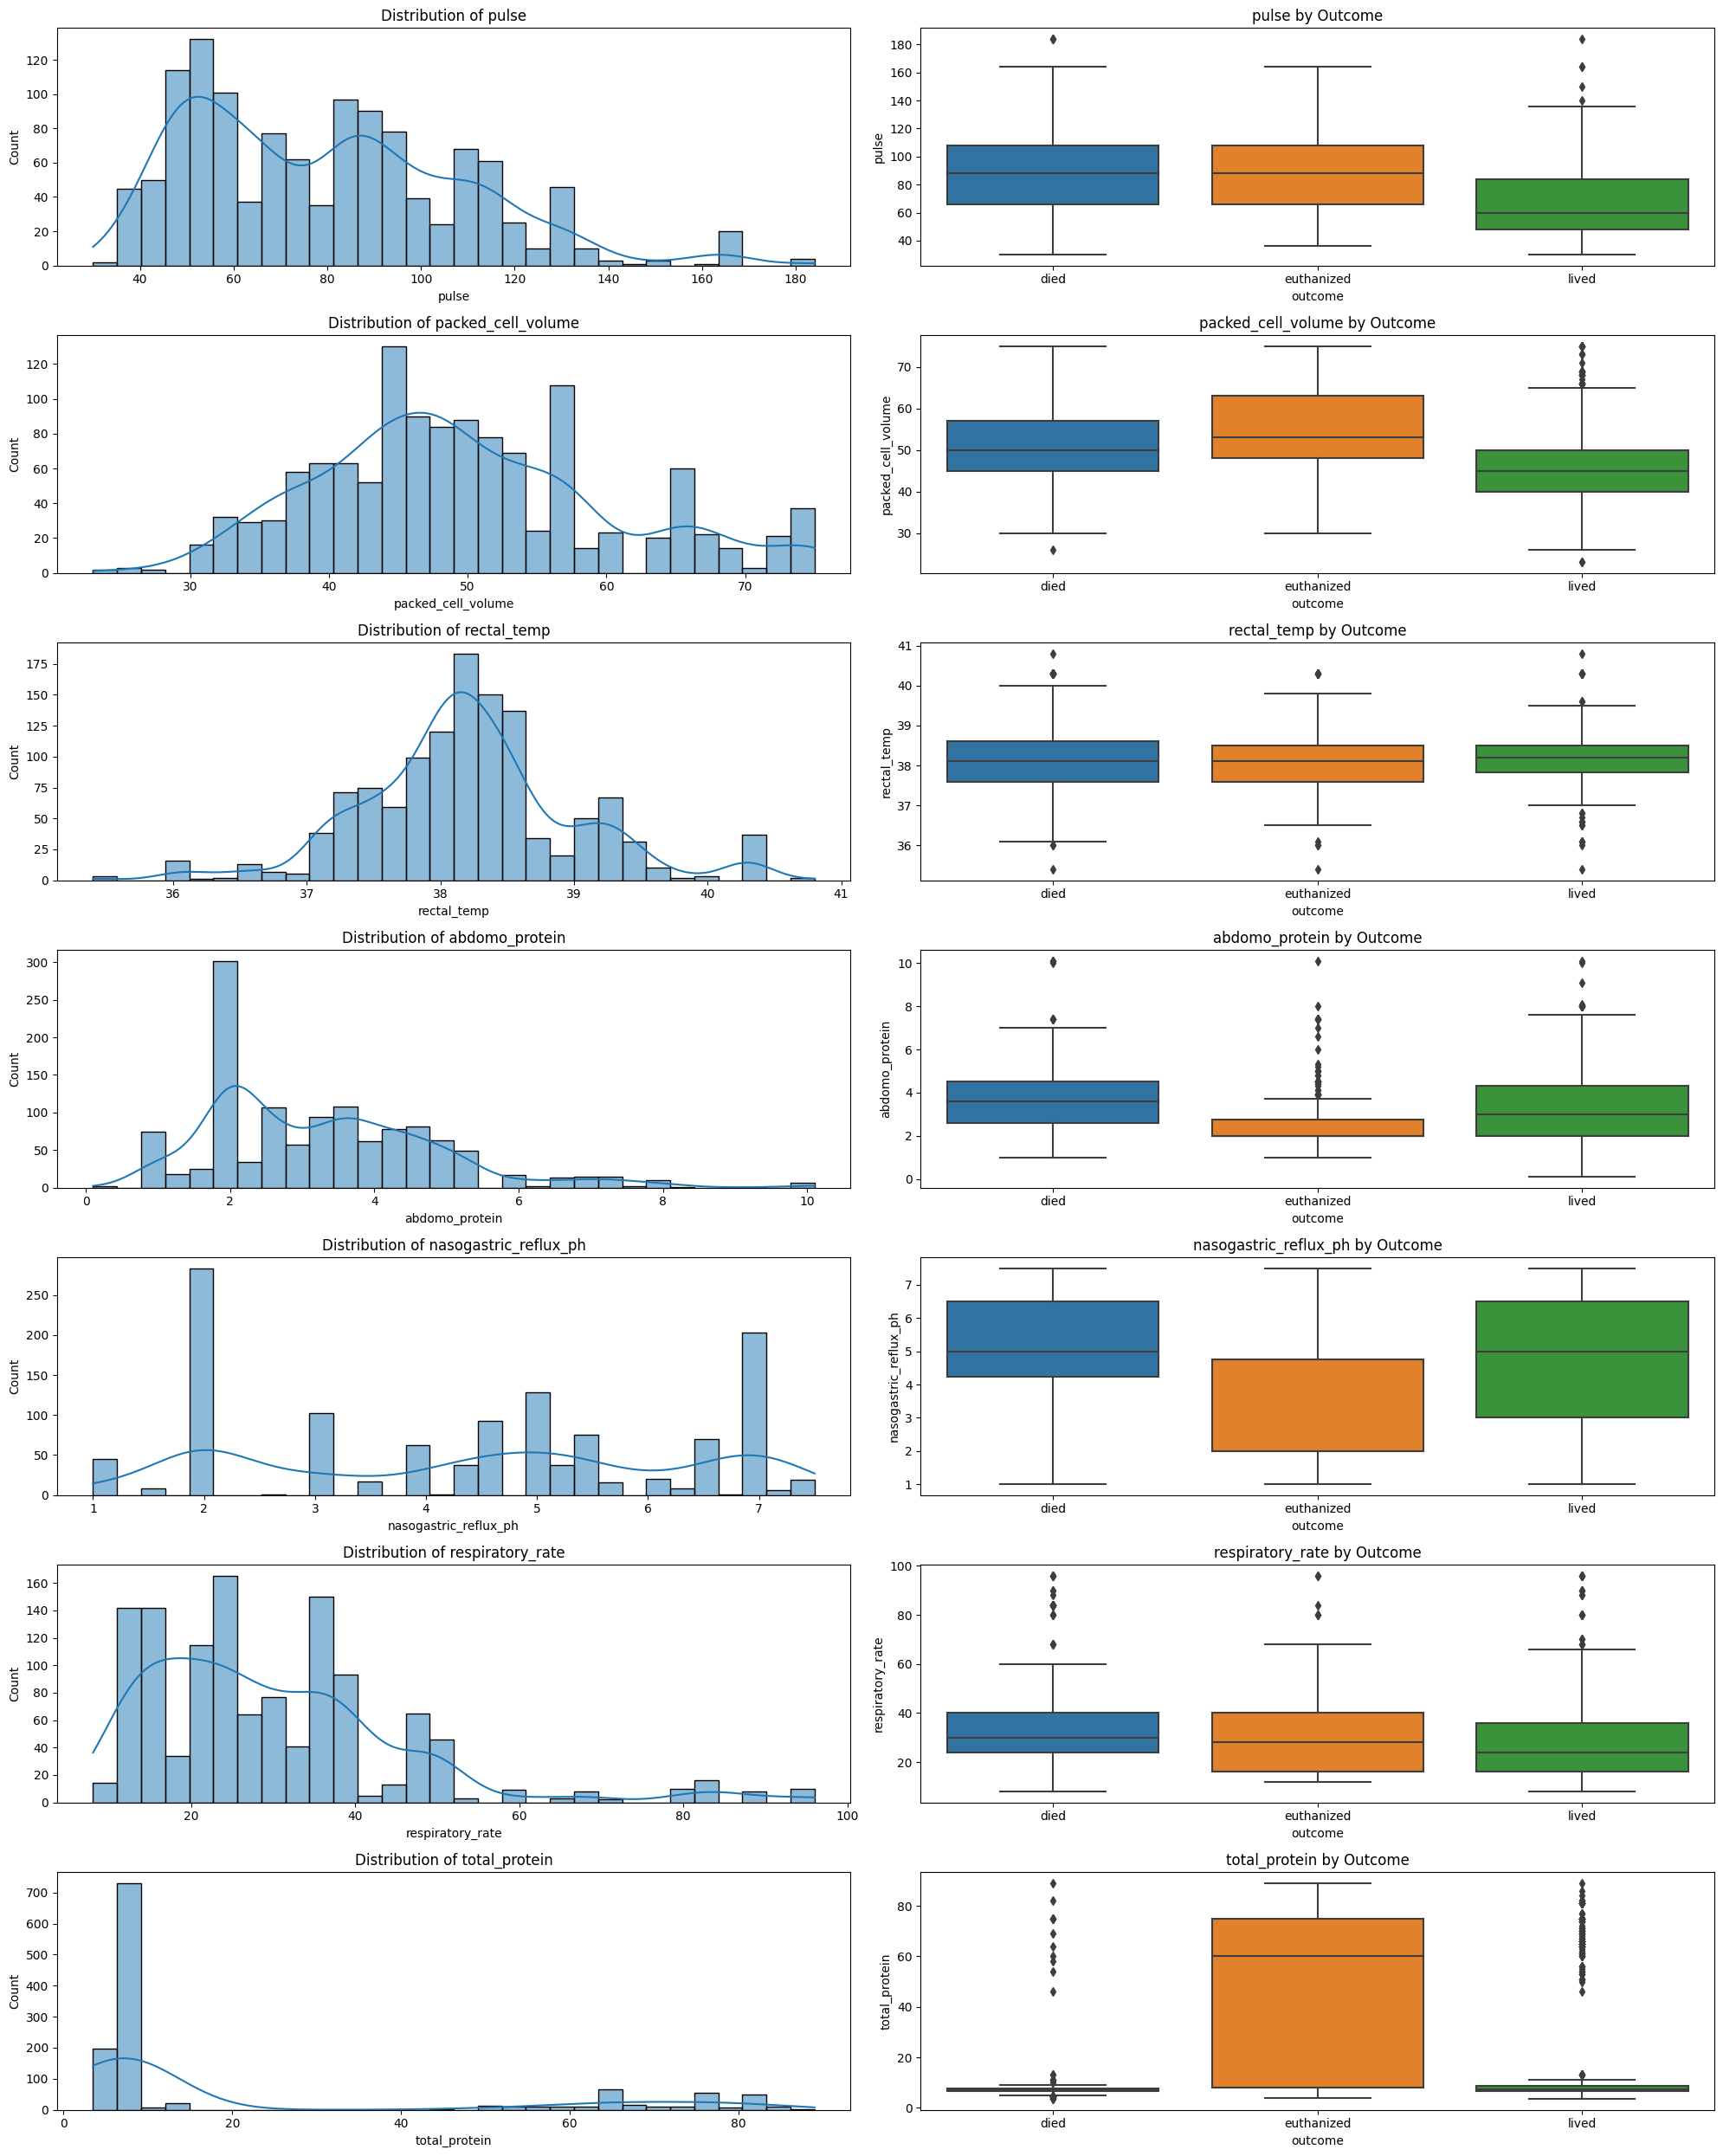

In [31]:
# Visualization for Continuous Numeric Columns: Histograms and Boxplots side by side
plt.figure(figsize=(20, 25))

for i, col in enumerate(continuous_numeric_cols, 1):
    # Histogram for distribution
    plt.subplot(len(continuous_numeric_cols), 2, 2*i-1)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    # Boxplot for distribution based on outcome
    plt.subplot(len(continuous_numeric_cols), 2, 2*i)
    sns.boxplot(data=train_df, x='outcome', y=col)
    plt.title(f'{col} by Outcome')

plt.tight_layout()
plt.show()


Correlation

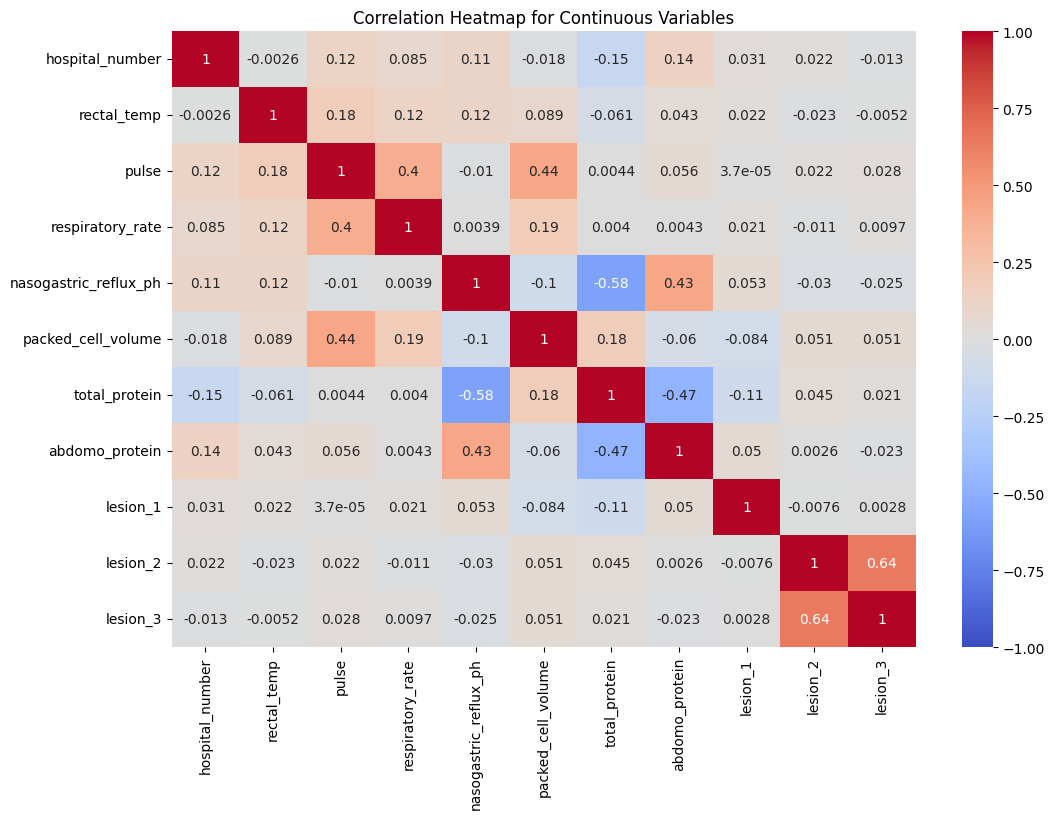

In [33]:
# Compute the correlation matrix for continuous numeric columns
correlation_matrix = train_df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Continuous Variables")
plt.show()


In [64]:
# Outlier detection using IQR method
outliers = {}

for col in continuous_numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]

# Displaying the number of outliers for each continuous variable
outliers_count = {col: len(outliers_data) for col, outliers_data in outliers.items()}
outliers_count


{'hospital_number': 110,
 'packed_cell_volume': 0,
 'lesion_1': 306,
 'id': 0,
 'respiratory_rate': 57,
 'nasogastric_reflux_ph': 0,
 'abdomo_protein': 19,
 'pulse': 4,
 'total_protein': 300,
 'rectal_temp': 72}

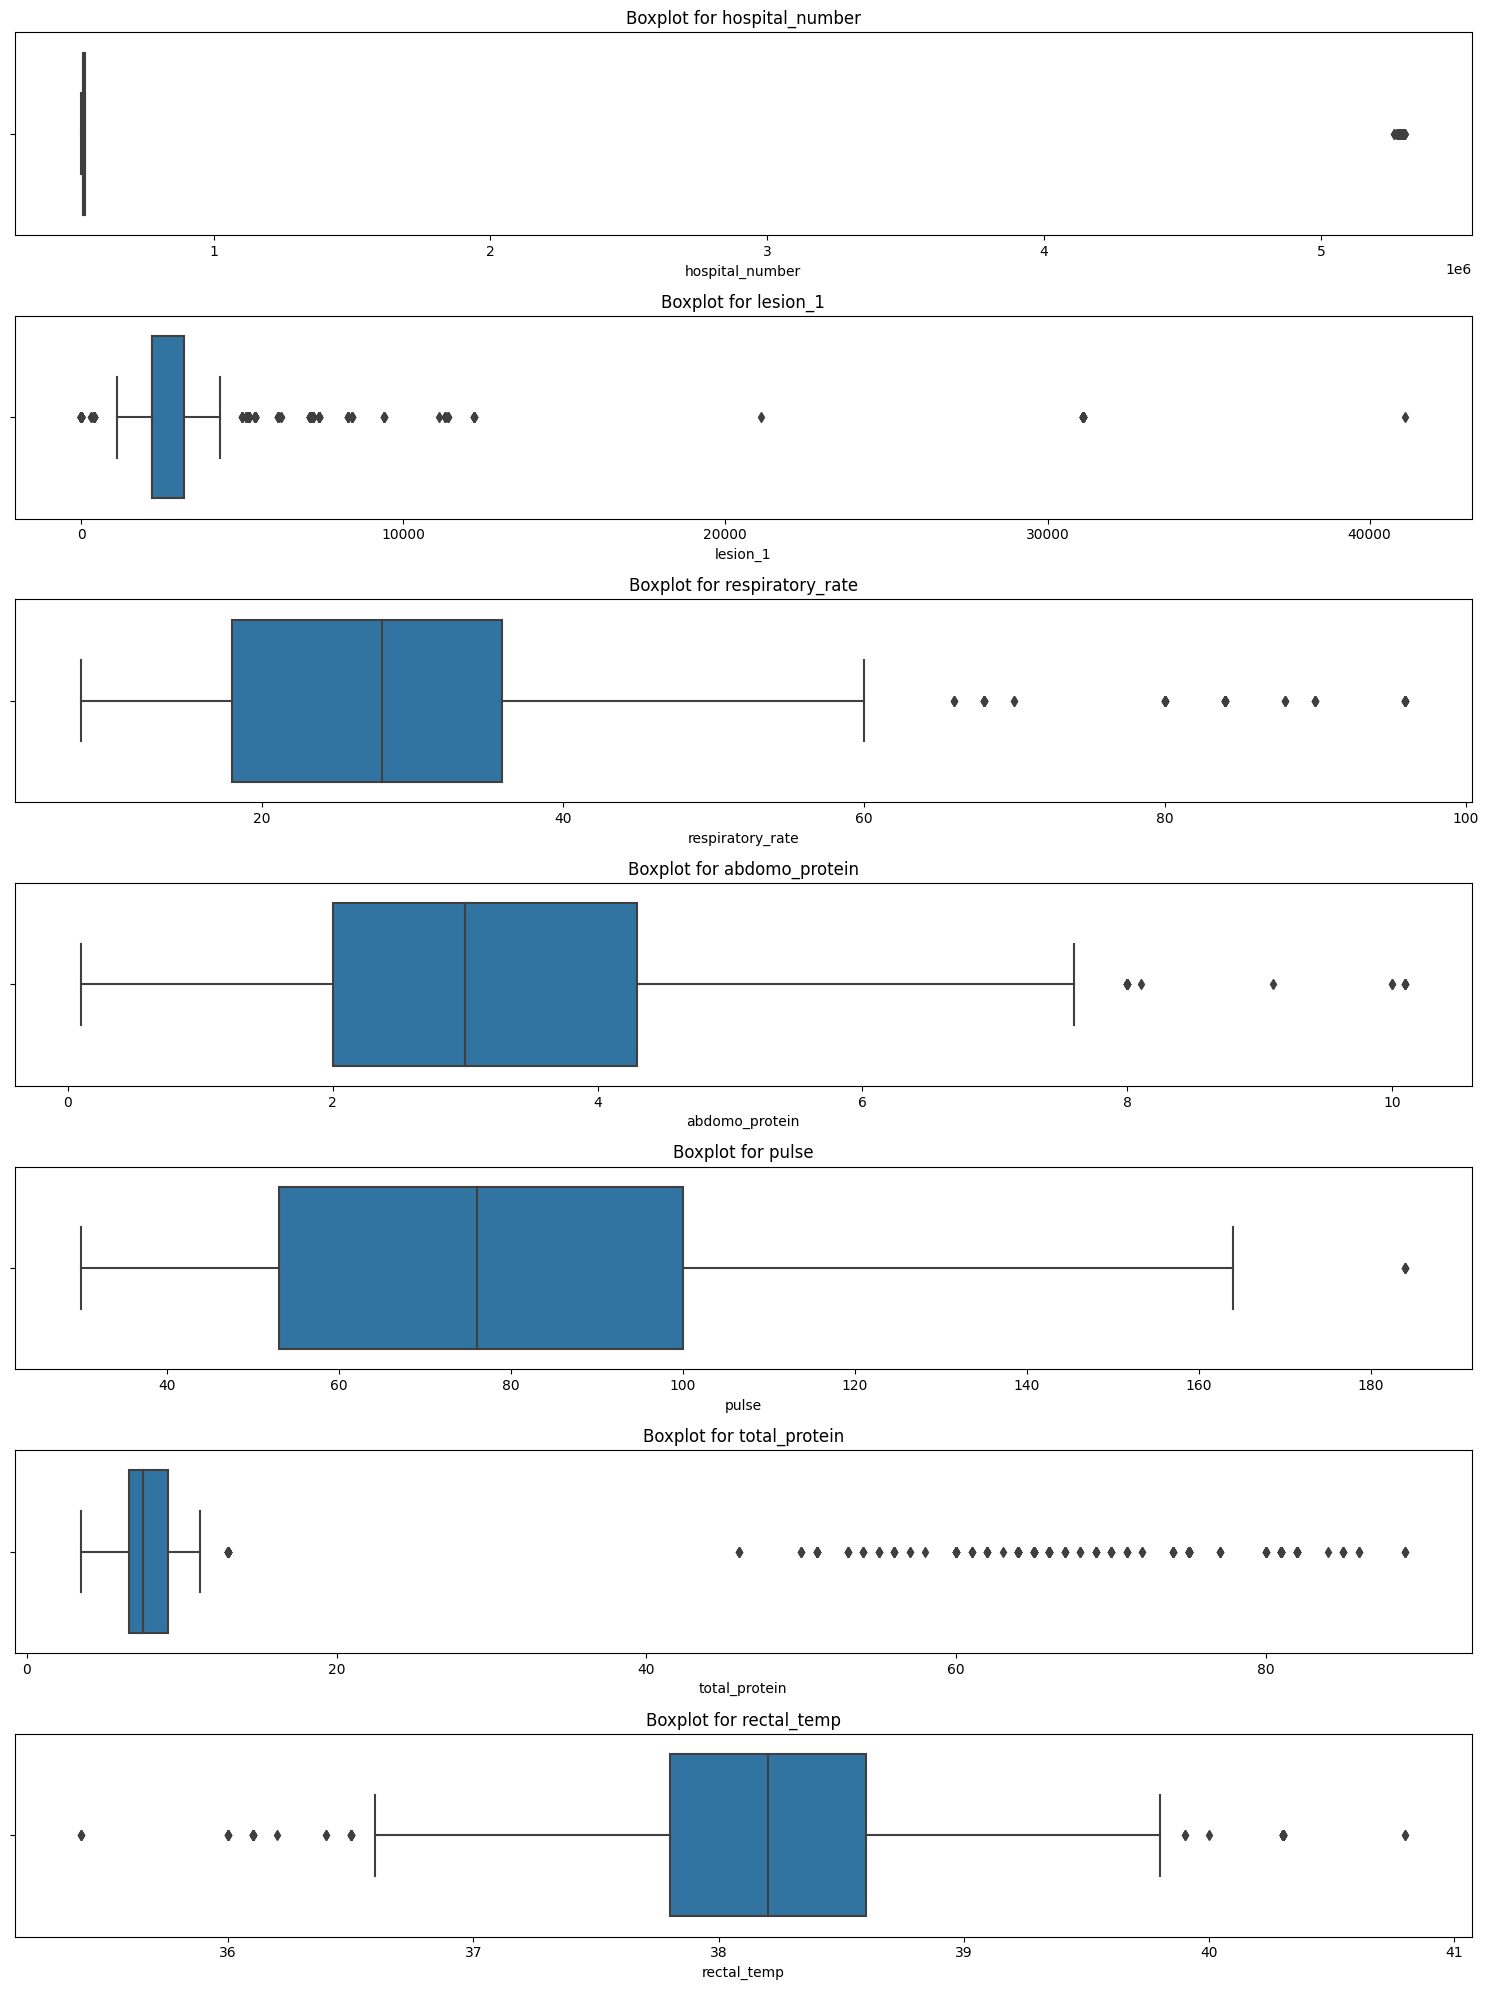

In [65]:
# Visualize outliers using boxplots for columns with detected outliers
columns_with_outliers = [col for col, count in outliers_count.items() if count > 0]

plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(len(columns_with_outliers), 1, i)
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


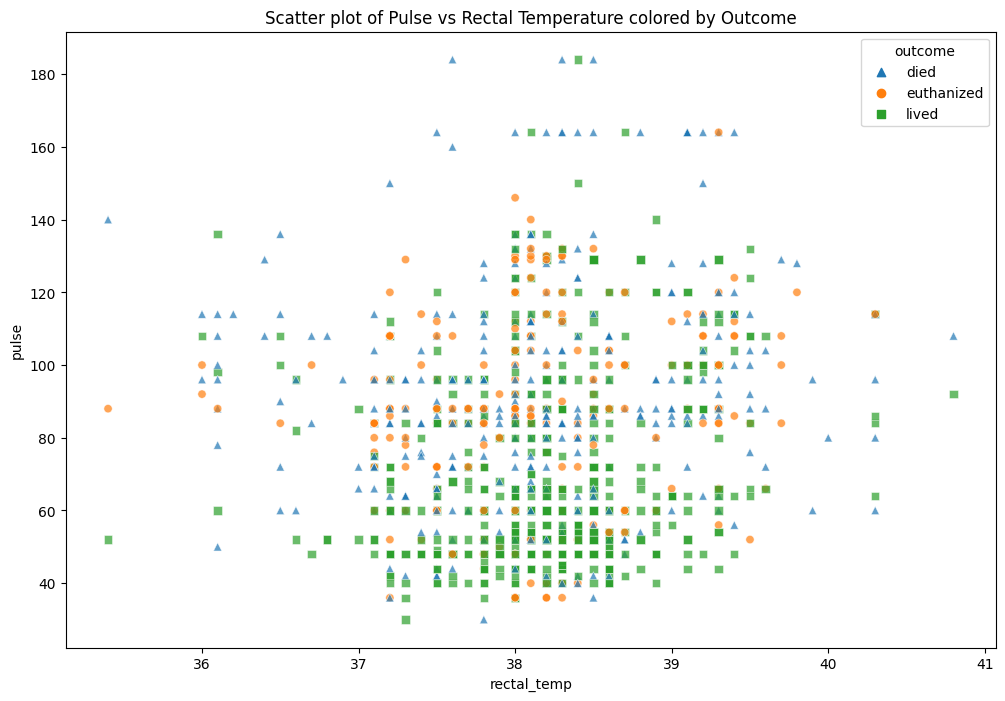

In [76]:
# Bivariate Analysis: Scatter plot for pulse vs rectal_temp colored by outcome
markers = ["^", "o", "s"]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_df, x='rectal_temp', y='pulse', hue='outcome',style='outcome',markers=markers, alpha=0.7)
plt.title("Scatter plot of Pulse vs Rectal Temperature colored by Outcome")
plt.show()


Mutlivariant analysis

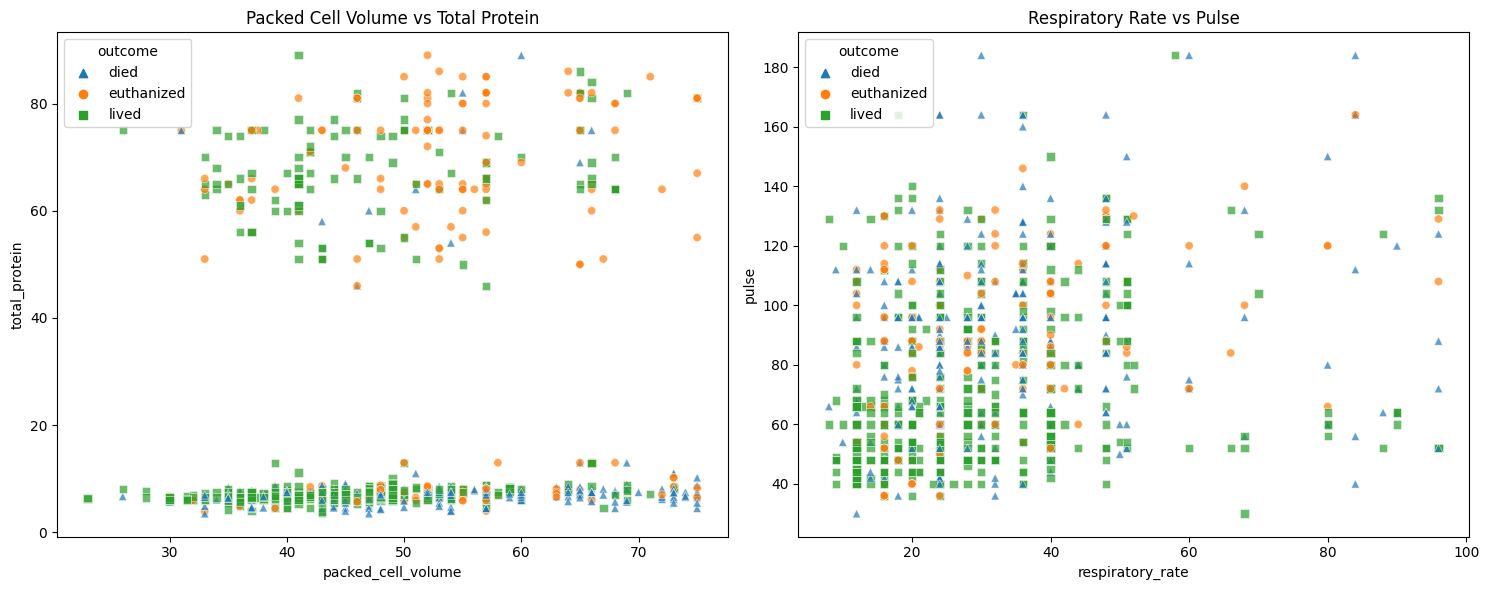

In [38]:
# Bivariate Analysis

# Scatter plot for packed_cell_volume vs total_protein colored by outcome
markers = ["^", "o", "s"]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_df, x='packed_cell_volume', y='total_protein', hue='outcome',style='outcome',markers=markers , alpha=0.7)
plt.title("Packed Cell Volume vs Total Protein")

# Scatter plot for respiratory_rate vs pulse colored by outcome
plt.subplot(1, 2, 2)
sns.scatterplot(data=train_df, x='respiratory_rate', y='pulse', hue='outcome',style='outcome',markers=markers, alpha=0.7)
plt.title("Respiratory Rate vs Pulse")

plt.tight_layout()
plt.show()


In [40]:
continuous_numeric_cols

['pulse',
 'packed_cell_volume',
 'rectal_temp',
 'abdomo_protein',
 'nasogastric_reflux_ph',
 'respiratory_rate',
 'total_protein']

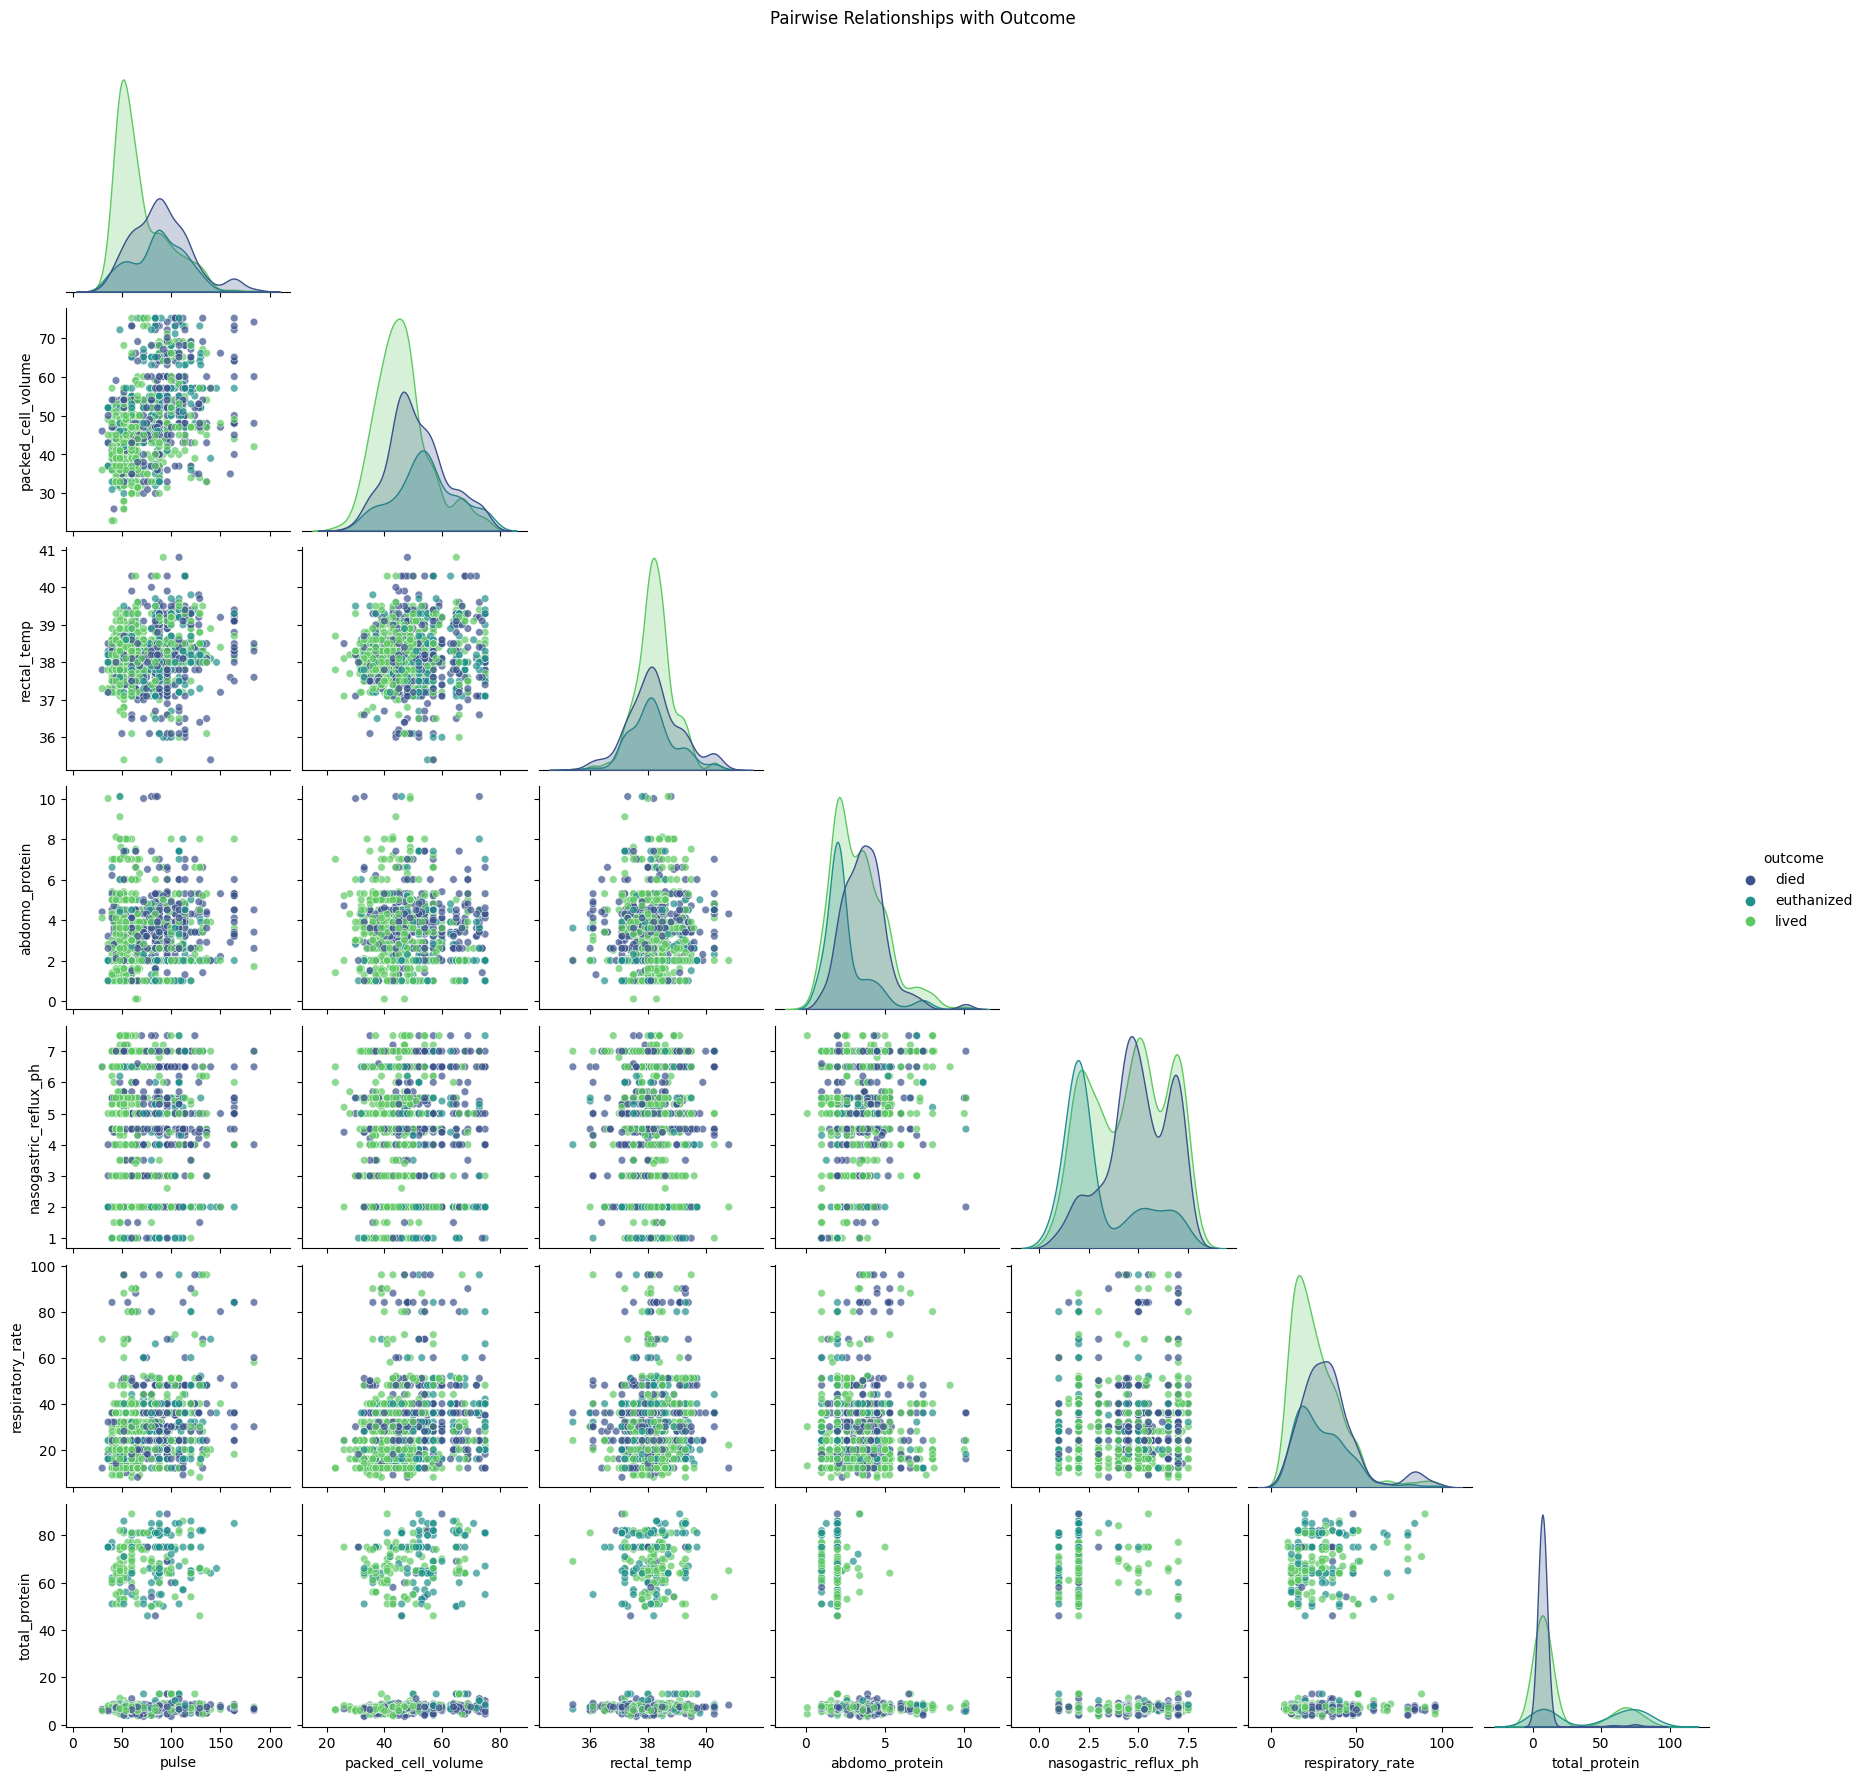

In [41]:
selected_columns = continuous_numeric_cols+['outcome']
sns.pairplot(train_df[selected_columns], hue='outcome', palette='viridis', corner=True, plot_kws={"s": 30, "alpha": 0.7})
plt.suptitle("Pairwise Relationships with Outcome", y=1.02)
plt.show()


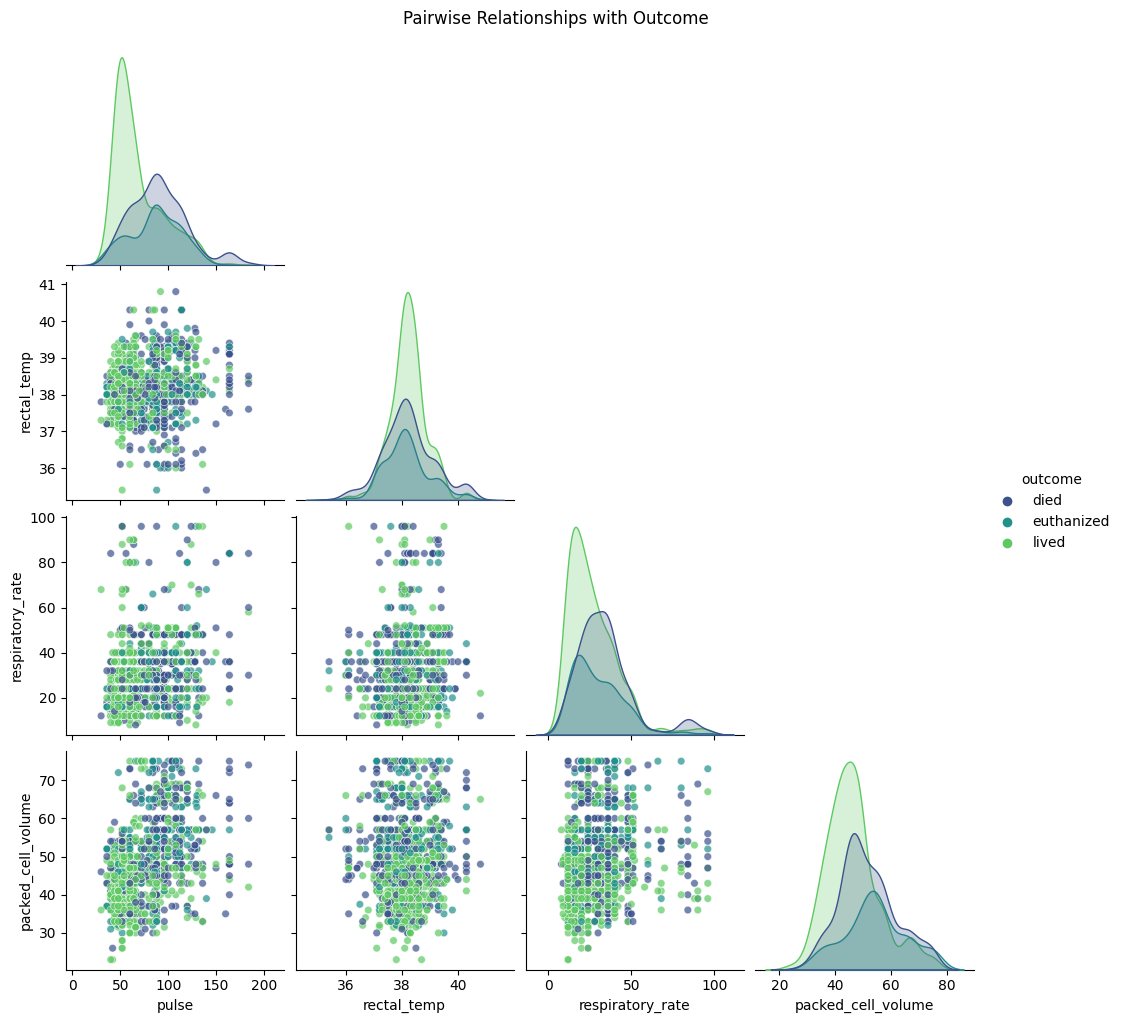

In [68]:
# Multivariate Analysis using Pair Plots
selected_columns = ['pulse', 'rectal_temp', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sns.pairplot(train_df[selected_columns], hue='outcome', palette='viridis', corner=True, plot_kws={"s": 30, "alpha": 0.7})
plt.suptitle("Pairwise Relationships with Outcome", y=1.02)
plt.show()


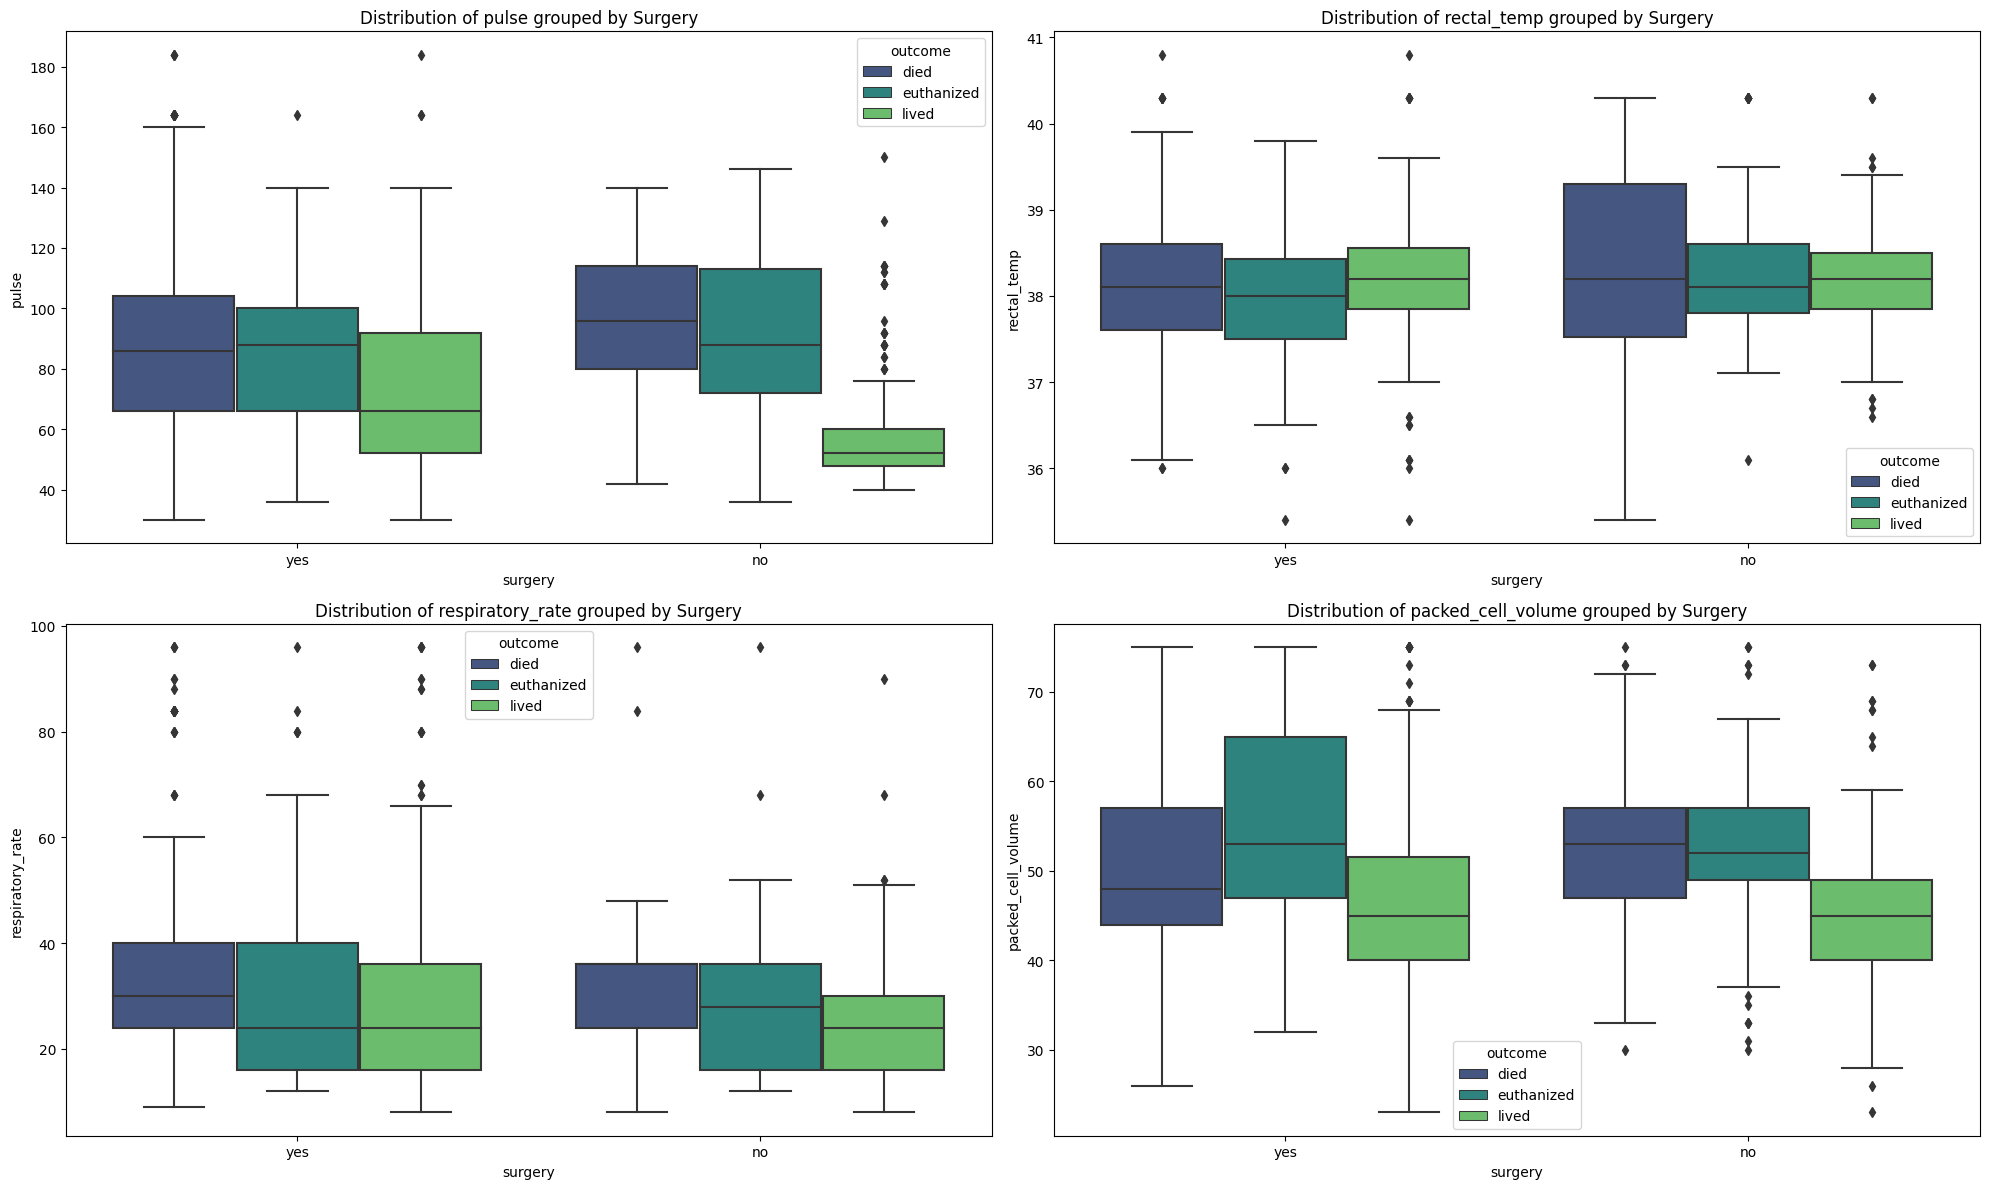

In [69]:
# Grouped Analysis: Visualizing continuous variables grouped by 'surgery'

# List of continuous variables to visualize
variables_to_visualize = ['pulse', 'rectal_temp', 'respiratory_rate', 'packed_cell_volume']

plt.figure(figsize=(20, 12))

for i, col in enumerate(variables_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train_df, x='surgery', y=col, hue='outcome', palette='viridis')
    plt.title(f'Distribution of {col} grouped by Surgery')

plt.tight_layout()
plt.show()


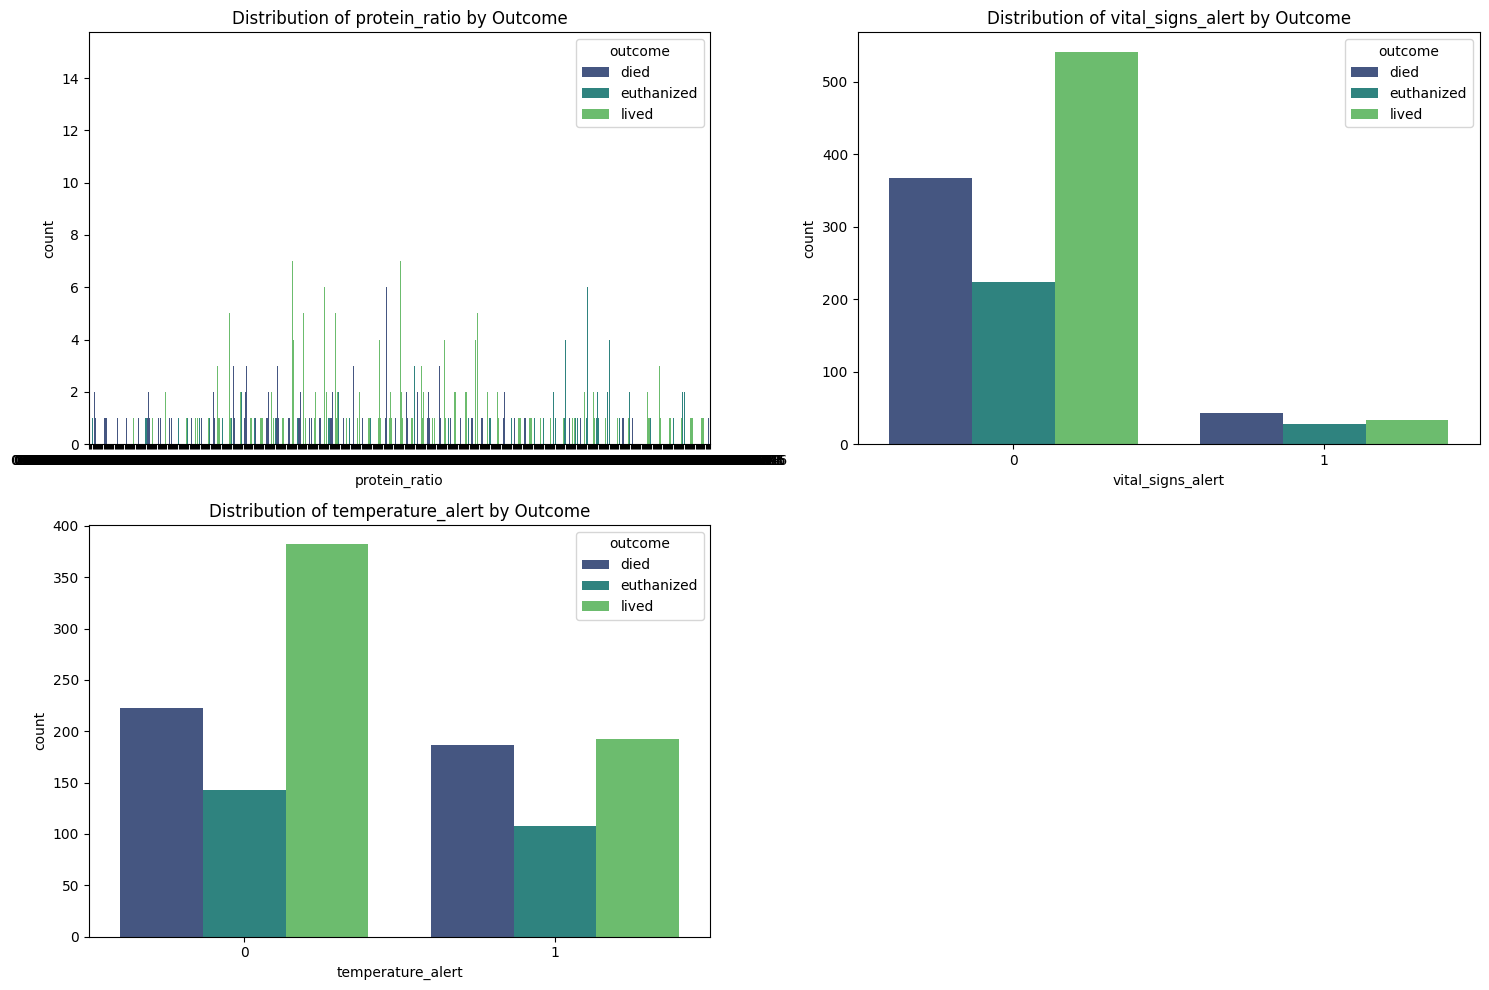

In [70]:
# Creating new features

# 1. Protein Ratio
train_df['protein_ratio'] = train_df['total_protein'] / train_df['packed_cell_volume']

# 2. Vital Signs Alert
pulse_75th_percentile = train_df['pulse'].quantile(0.75)
respiratory_rate_75th_percentile = train_df['respiratory_rate'].quantile(0.75)
train_df['vital_signs_alert'] = ((train_df['pulse'] > pulse_75th_percentile) & 
                                  (train_df['respiratory_rate'] > respiratory_rate_75th_percentile)).astype(int)

# 3. Temperature Alert
train_df['temperature_alert'] = ((train_df['rectal_temp'] < 37.5) | 
                                  (train_df['rectal_temp'] > 38.5)).astype(int)

# Visualize the distribution of the new features across different outcomes
new_features = ['protein_ratio', 'vital_signs_alert', 'temperature_alert']

plt.figure(figsize=(15, 10))
for i, col in enumerate(new_features, 1):
    if col in continuous_numeric_cols:
        plt.subplot(2, 2, i)
        sns.boxplot(data=train_df, x='outcome', y=col, palette='viridis')
        plt.title(f'{col} by Outcome')
    else:
        plt.subplot(2, 2, i)
        sns.countplot(data=train_df, x=col, hue='outcome', palette='viridis')
        plt.title(f'Distribution of {col} by Outcome')

plt.tight_layout()
plt.show()


lesion_1 mapping

In [ ]:
site_mapping = {
    1: 'gastric', 2: 'sm intestine', 3: 'lg colon', 4: 'lg colon and cecum', 
    5: 'cecum', 6: 'transverse colon', 7: 'retum/descending colon', 
    8: 'uterus', 9: 'bladder', 11: 'all intestinal sites', 0: 'none'
}
type_mapping = {
    1: 'simple', 2: 'strangulation', 3: 'inflammation', 4: 'other', 0: 'n/a'
}
subtype_mapping = {
    1: 'mechanical', 2: 'paralytic', 0: 'n/a'
}
specific_code_mapping = {
    1: 'obturation', 2: 'intrinsic', 3: 'extrinsic', 4: 'adynamic', 5: 'volvulus/torsion',
    6: 'intussuption', 7: 'thromboembolic', 8: 'hernia', 9: 'lipoma/slenic incarceration',
    10: 'displacement', 0: 'n/a'
}

In [ ]:
def explode_lesion(x):
    code = str(x)

    if len(code) == 3:
        result = [np.nan, code[0], code[1], code[2]]

    elif len(code) == 4:
        result = [code[0], code[1], code[2], code[3]]

    elif len(code) == 5:
        if code[0:1] == '11':
            result = [code[0:1], code[2], code[3], code[4]]
        else:
            result = [code[0], code[1], code[2], code[3:4]]

    else:
        result = [np.nan, np.nan, np.nan, np.nan]

    final_result = [
        i
        if i != '0'
        else np.nan
        for i in result
    ]

    return final_result

df[['lesion_1_site', 'lesion_1_type', 'lesion_1_subtype', 'lesion_1_code']] = df.lesion_1.apply(explode_lesion).apply(pd.Series)